## Part B: Newton Method Implementation

In [14]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import random
import os

In [15]:
def func(x1, x2):
    # Define the function
    ####### TODO ########
    res = 2 * x1 ** 2 + 2 * x2 ** 2 - 17 * x2 * np.cos(0.2 * np.pi * x1) - x1 *x2
    #####################
    return res

In [16]:
def hessian(x1, x2):
    # Calculate the hessian matrix
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    h11 = 4 + 17 * x2 * np.cos(0.2 * np.pi * x1) * (0.2 * np.pi) ** 2
    h12 = 17 * np.sin(0.2 * np.pi * x1) * (0.2 * np.pi) - 1
    h21 = 17 * np.sin(0.2 * np.pi * x1) * (0.2 * np.pi) - 1
    h22 = 4
    res = np.array([[h11, h12], [h21, h22]])
    #####################
    return res

In [17]:
# Define function inputs
def hessianInv(hessian_matrix):
    # Calculate the determinant and inverse of the hessian matrix
    ####### TODO ########
    inv = np.linalg.inv(hessian_matrix)
    #####################
    return inv

In [18]:
def gradient(x1, x2):
    # Calculate the gradient vector
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    g1 = 4 * x1 + 17 * x2 * np.sin(0.2 * np.pi * x1) * (0.2 * np.pi) - x2
    g2 = 4 * x2 - 17 * np.cos(0.2 * np.pi * x1) - x1
    res = np.array([[g1], [g2]])
    #####################
    return res

In [19]:
def newtonMethod(x1, x2, epochs, step_size):
    for i in range(epochs):
        # Perform one step of the newton method
        # Use previous functions to implement this part
        # Update values of x1 and x2
        ####### TODO ########
        hessian_matrix = hessian(x1, x2)
        hessian_inv = hessianInv(hessian_matrix)
        gradient_vector = gradient(x1, x2)
        delta = np.matmul(hessian_inv, gradient_vector)
        x1 = x1 - step_size * delta[0][0]
        x2 = x2 - step_size * delta[1][0]
        #####################
    return x1, x2

Now we shall go on to finding the minimum value

In [20]:
x1 = 1
x2 = 3
epochs = 100
x1, x2 = newtonMethod(x1, x2, epochs, 0.5)
minVal = func(x1, x2)
print(f"x1 is: {x1} and x2 is: {x2} (after {epochs} epochs)")
print(f"The Minimum Value for the function is: {minVal} (after {epochs} epochs)")

x1 is: 0.13087466007249957 and x2 is: 4.268357652256218 (after 100 epochs)
The Minimum Value for the function is: -36.40349774185023 (after 100 epochs)


* desired output is (approximately):
* x1 is: 0.13 and x2 is: 4.27 (after 100 epochs)
* The Minimum Value for the function is: -36.40 (after 100 epochs)

Now we go on to plot the wanted shape

In [21]:
####### TODO #########
stepSize = 0.5
range_x1 = np.arange(-5, 5, 0.2)
range_x2 = np.arange(0, 10, 0.2)

In [22]:
xs = []
ys = []
# We want to classify the points into three categories:
# Close = -1, Far = 0, Further = 1
categories = []
for x1 in range_x1:
    for x2 in range_x2:
        # Use Newton method and find the distance as stated in the question
        ######## TODO ##########
        x1_new , x2_new = newtonMethod(x1, x2, 100, stepSize)
        distance = func(x1_new, x2_new) - minVal
        ########################
        if distance < 15:
            categories.append(-1)
        elif distance < 150:
            categories.append(0)
        else:
            categories.append(1)
        xs.append(x1)
        ys.append(x2)

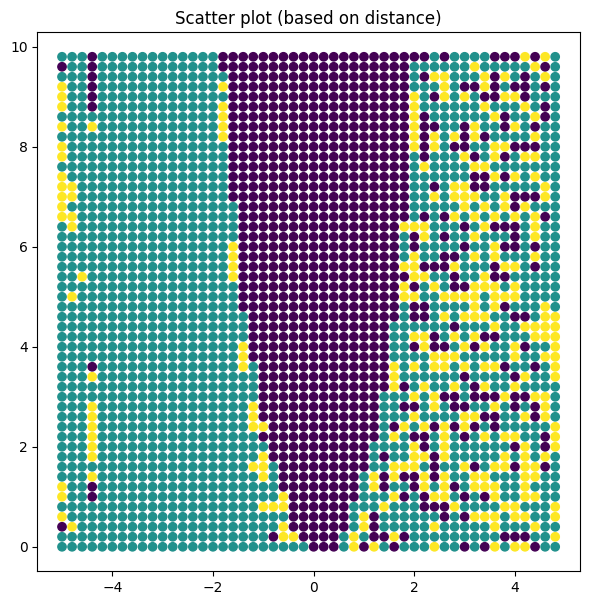

In [23]:
plt.figure(figsize=(7,7))
plt.title('Scatter plot (based on distance)')
########## TODO ###########
plt.scatter(xs, ys, c=categories)
###########################
plt.show()

As we know, Newton-Raphson approach has 2 main problems: it can get stuck in local minima, or it can be unstable and diverge even if a minimum exists. At the center of the above graph, all initial points have been converged to the global minimum (dark blue dots). At the left side, most of the initial points have converged to a local minmum (greenish-blue dots) and initial points at the right side of the graph have been diverged, because small differnces in initial point have been led to huge differences in final answer.